In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import f1_score

In [28]:
names_r = ["c" + str(i) for i in range(13)] + ["class"]
df = pd.read_fwf('housing_Bostondata.csv', names = names_r)

In [29]:
df.head(10)

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,c10,c11,c12,class
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [30]:
df.isna().sum()

c0       0
c1       0
c2       0
c3       0
c4       0
c5       0
c6       0
c7       0
c8       0
c9       0
c10      0
c11      0
c12      0
class    0
dtype: int64

In [31]:
acc_arr = ()

In [32]:
X = df.values[:, :-1]
y = df.values[:, -1]
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [33]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
X = scaler.transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
X_train.shape, X_test.shape

((404, 13), (102, 13))

In [35]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state = 0) 
regressor.fit(X_train, y_train)
dtree_pred = regressor.predict(X_test)
dtree_mae = mae(y_true = y_test , y_pred = dtree_pred)
print(dtree_mae)
acc_arr = acc_arr + (("decision tree", dtree_mae),)

3.2186274509803927


In [36]:
#Knn Regression
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn_mae = mae(y_pred=y_pred, y_true=y_test)
print(f"mae: {knn_mae}")
acc_arr = acc_arr + (("KNN Regression", knn_mae),)

mae: 3.630718954248366


In [37]:
#Linear Regression
from sklearn import datasets, linear_model
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
regr_pred = regr.predict(X_test)
regr_mae = mae(y_pred=regr_pred, y_true=y_test)
print(f"mae: {regr_mae}")
acc_arr = acc_arr + (("Linear Regression", regr_mae),)

mae: 3.360528702873559


In [38]:
#Support vector machine
from sklearn.svm import SVR
svm = SVR(kernel = 'rbf')
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)
svm_mae = mae(y_pred=svm_pred, y_true=y_test)
print(f"mae: {svm_mae}")
acc_arr = acc_arr + (("SVM Regression", svm_mae),)

mae: 3.9745463343556873


In [39]:
#MLP Regression
from sklearn.neural_network import MLPRegressor
MLP = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
mlp_pred = MLP.predict(X_test)
mlp_mae = mae(y_pred=mlp_pred, y_true=y_test)
print(f"mae: {mlp_mae}")
acc_arr = acc_arr + (("MLP Regression", mlp_mae),)

mae: 3.9906367045945013


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [40]:
acc_arr = list(acc_arr)

In [41]:
print(acc_arr)

[('decision tree', 3.2186274509803927), ('KNN Regression', 3.630718954248366), ('Linear Regression', 3.360528702873559), ('SVM Regression', 3.9745463343556873), ('MLP Regression', 3.9906367045945013)]


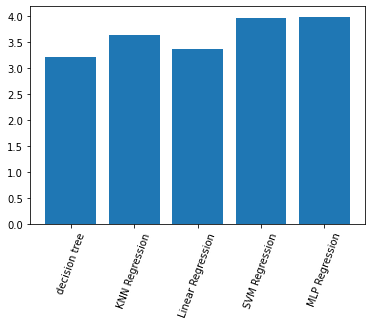

In [42]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(range(len(acc_arr)), [val[1] for val in acc_arr], align='center')
plt.xticks(range(len(acc_arr)), [val[0] for val in acc_arr])
plt.xticks(rotation=70)
plt.show()